In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import import_ipynb
import data_preperation as dp
import internal_inconsistencies as ii
import external_inconsistencies as ei


importing Jupyter notebook from data_preperation.ipynb
importing Jupyter notebook from internal_inconsistencies.ipynb
importing Jupyter notebook from external_inconsistencies.ipynb


In [2]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ', 'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'UK'}

abbr_list=list(countries.values())

# 1. Data mismatches in ENTSO-E data

## 1.1 Calculating missing values in data files

,Country,No. of missing data in Load data,No. of missing data in Generation data,No. of missing data in Transmission data
0,AT,0,0,0
1,BE,0,8027,50
2,BG,26,8760,1732
3,CH,0,8760,0
4,CZ,7,44,0
5,DE,96,34848,36
6,DK,0,0,0
7,EE,168,2266,4437
8,ES,2,8780,0
9,FI,3,28,429


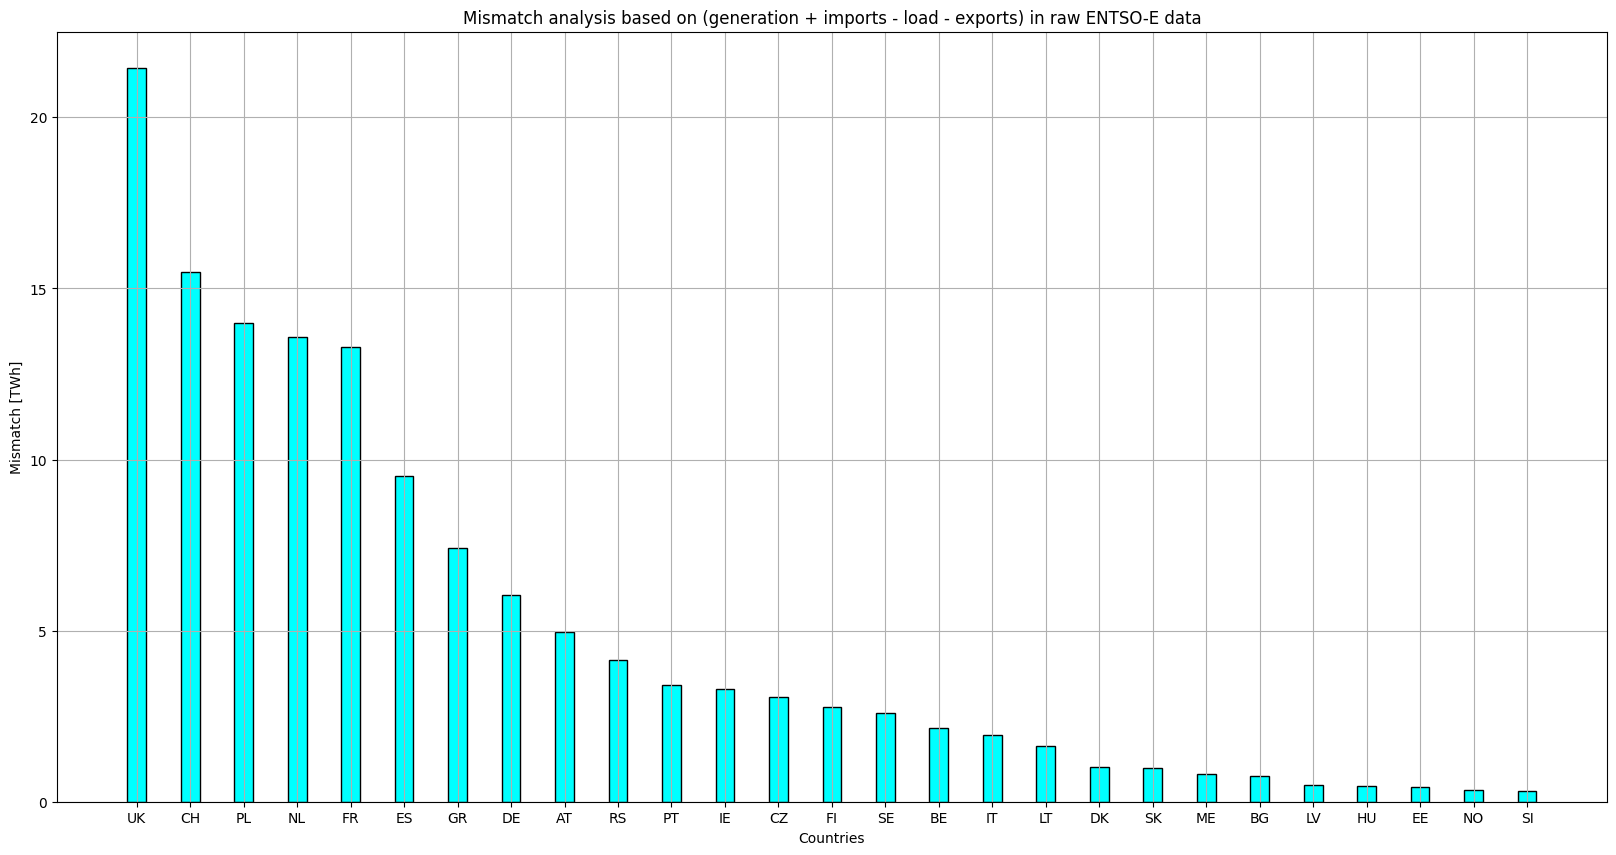

In [3]:
ii.mismatch_raw_data(countries)


# 2. ENTSO-E data representation

## 2.1 Get all the hourly load data of each country to a single dataframe

In [4]:
load_data,load_dic=dp.load(countries)
display(load_data)


,Day,Month,Year,Time,AT,BE,BG,CH,CZ,DE,...,ME,NL,NO,PL,PT,RS,SE,SI,SK,UK
0,01,01,2018,00:00 - 01:00,6154.75,8545.75,4094.0,7629.0,5520.0,44877.75,...,418.0,10823.00,16989.0,14979.0,4870.0,5095.0,15563.0,1126.0,2845.0,31540.0
1,01,01,2018,01:00 - 02:00,5934.25,8143.50,3910.0,7355.0,5495.0,43816.50,...,403.0,10689.75,16762.0,14398.0,4639.0,5142.0,15229.0,1103.0,2734.0,31486.0
2,01,01,2018,02:00 - 03:00,5728.75,7789.00,3761.0,7282.0,5461.0,42820.00,...,377.0,10353.75,16509.0,13789.0,4500.0,4908.0,15259.0,1056.0,2659.0,30717.0
3,01,01,2018,03:00 - 04:00,5467.25,7470.75,3654.0,7457.0,5302.0,42051.75,...,351.0,10032.25,16109.0,13434.0,4254.0,4564.0,15026.0,1018.0,2583.0,28379.0
4,01,01,2018,04:00 - 05:00,5327.50,7354.50,3602.0,7429.0,5258.0,42061.50,...,333.0,9766.25,16152.0,13285.0,4047.0,4297.0,14844.0,1006.0,2568.0,26049.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31,12,2018,19:00 - 20:00,7241.25,9655.75,5211.0,7268.0,6613.0,54365.50,...,520.0,13771.75,17569.0,18543.0,6616.0,6072.0,17255.0,1540.0,3169.0,41221.0
8757,31,12,2018,20:00 - 21:00,6846.25,9188.00,4799.0,6996.0,6369.0,50783.00,...,501.0,12802.00,16899.0,17283.0,6559.0,5761.0,16421.0,1439.0,3093.0,38002.0
8758,31,12,2018,21:00 - 22:00,6473.00,8959.25,4680.0,6613.0,6215.0,48764.75,...,471.0,11962.25,16559.0,16447.0,6013.0,5379.0,15692.0,1342.0,2991.0,34996.0
8759,31,12,2018,22:00 - 23:00,6569.00,9217.25,4607.0,6396.0,6093.0,48232.25,...,441.0,11481.50,16088.0,16070.0,5506.0,5209.0,15268.0,1287.0,2937.0,32300.0


## 2.2 Get all the hourly generation data of each country from each source to a single dataframe

In [5]:
generation_data,generation_dic,load_dic=dp.generation(load_dic,countries)
display(generation_data)

,Day,Month,Year,Time,AT - Biomass,AT - Fossil Gas,AT - Fossil Hard coal,AT - Hydro Pumped Storage,AT - Hydro Run-of-river and poundage,AT - Hydro Water Reservoir,...,UK - Fossil Gas,UK - Fossil Hard coal,UK - Fossil Oil,UK - Hydro Pumped Storage,UK - Hydro Run-of-river and poundage,UK - Nuclear,UK - Other,UK - Solar,UK - Wind Offshore,UK - Wind Onshore
0,01,01,2018,00:00 - 01:00,316.0,78.25,151.00,0.0,3343.00,200.50,...,5475.0,1341.5,0.0,22.5,353.5,7268.0,89.0,0.0,3804.5,5333.0
1,01,01,2018,01:00 - 02:00,316.0,71.00,150.25,0.0,3099.50,244.50,...,5525.5,1298.0,0.0,0.0,351.5,7265.5,89.0,0.0,3801.0,5475.0
2,01,01,2018,02:00 - 03:00,316.0,69.25,149.00,0.0,3059.25,216.50,...,5834.5,1597.0,0.0,103.0,352.0,7259.0,88.5,0.0,3821.0,5379.0
3,01,01,2018,03:00 - 04:00,316.0,69.50,149.25,0.0,3007.75,159.25,...,5175.0,1615.0,0.0,0.0,335.5,7258.0,89.0,0.0,3800.5,5211.5
4,01,01,2018,04:00 - 05:00,316.0,72.25,148.75,0.0,3035.75,124.25,...,4562.5,1659.5,0.0,0.0,282.0,7254.5,89.0,0.0,3773.5,5198.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31,12,2018,19:00 - 20:00,304.0,1807.00,154.75,156.5,2895.50,209.50,...,14146.5,1742.5,10.5,194.5,487.5,6930.5,63.5,0.0,1317.5,4894.5
8757,31,12,2018,20:00 - 21:00,302.0,1748.75,154.75,0.0,2870.75,174.25,...,12301.0,1449.5,1.0,165.5,442.0,6937.0,63.0,0.0,2667.0,7160.5
8758,31,12,2018,21:00 - 22:00,300.0,1669.00,155.25,0.0,2827.75,126.50,...,9984.0,1015.5,0.0,217.5,424.0,6935.0,63.5,0.0,2815.0,6979.5
8759,31,12,2018,22:00 - 23:00,303.0,1559.50,154.00,0.0,2751.75,124.75,...,7757.5,523.5,5.5,153.0,415.0,6938.5,65.0,0.0,2946.0,6825.5


## 2.3 Get all the hourly cross-border transmission data of each country to a single dataframe

In [6]:
crossborder_data, transmission_data = dp.cross_border(abbr_list)

In [7]:
display(transmission_data)

### 2.3.1 'cross_border_data' shows the net import/net export of the whole country in hourly timesteps

In [8]:
display(crossborder_data)

### 2.3.2 Calculate net imports/ net exports of each country in each hour based on generation - load data of the country

In [9]:
import_export_using_load_gen=dp.import_export_using_load_gen(load_data,generation_data,abbr_list)
# display(import_export_using_load_gen)

### 2.3.3 Calculate net imports/ net exports of each country in each hour based on cross-border transmission data of the country

In [10]:
import_export_using_crossborder_data=dp.import_export_using_crossborder(crossborder_data,abbr_list)
# display(import_export_using_crossborder_data)

# 3. Consolidation based on internal data

## 3.1 Obtaining consolidated ENTSO-E data using Internal Sigma Approach

### !!! This step takes about 1.6 hours to complete in an Intel I5 processor with 8 GB Ram

In [11]:
consolidated_gen_data, consolidated_load_data, consolidated_transmission_data = ii.internal_sigma(load_dic, generation_dic, transmission_data, countries)

SIGMA CALCULATED
VARIABLES DECLARED

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-07-30
Using license file C:\Users\lovin\gurobi.lic
OPTIMIZATION COMPLETED


## 3.2 Mismatch analysis in the consolidated ENTSO-E data

In [12]:
ii.mismatch_consolidated_data(consolidated_gen_data, consolidated_load_data,consolidated_transmission_data, countries)

,Country,Generation [GWh],Imports [GWh],Demand [GWh],Exports [GWh],Mismatch [GWh]
0,Austria,58311.13,25196.33,67719.58,15787.89,1.000000e-02
1,Belgium,71372.82,20358.43,88904.21,2827.04,6.366463e-12
2,Bulgaria,46516.60,26.38,40974.40,5568.58,5.456968e-12
3,Switzerland,55696.44,30703.12,60546.51,25853.05,3.637979e-12
4,Czech Republic,82473.17,8607.54,68246.82,22833.88,1.000000e-02
5,Germany,566837.13,21183.11,517243.23,70777.01,1.455192e-11
6,Denmark,29518.87,14519.24,34238.76,9799.35,1.818989e-12
7,Estonia,10944.66,2392.01,9157.01,4179.67,1.000000e-02
8,Spain,246429.21,20531.88,260995.07,5966.02,4.001777e-11
9,Finland,72649.77,15741.79,85773.02,2618.54,6.366463e-12


# 4. Comparission of ENTSO-E data with other sources

## 4.1 Comparing ENTSO-E & Eurostat data

### 4.1.1 Comparing annual generation data of ENTSO-E & Eurostat data

In [13]:
# ei.eurostat_comparission_gen_data(generation_data,countries)

### 4.1.2 Comparing annual load data of ENTSO-E & Eurostat data

In [14]:
# ei.eurostat_comparission_load_data(load_data, countries)


### 4.1.3 Comparing annual import/export data of ENTSO-E & Eurostat data

In [15]:
# ei.eurostat_comparission_transmission_data(import_export_using_crossborder_data, countries)